In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tqdm import tqdm
import cv2
import  csv

from google.colab import drive
drive.mount('/content/drive')

In [0]:
train = pd.read_pickle('/content/drive/My Drive/Colab Notebooks/gazegesturedetection/Stand April 2019_v01/Model Data/pickle/finaltrain.pkl')  # name of the folder containing train pickle file (here drive location)
val = pd.read_pickle('/content/drive/My Drive/Colab Notebooks/gazegesturedetection/Stand April 2019_v01/Model Data/pickle/finalval.pkl')      # name of the folder containing validation pickle file  (here drive location)

In [0]:
print(train['label'])
train['id'][0].astype('str')
print(train.shape[0])

In [0]:
from math import ceil
train_image = []
for i in tqdm(range(2911)): #(range( no of training images))
   
    img = cv2.imread('/content/drive/My Drive/Colab Notebooks/gazegesturedetection/crop/train/'+'train'+str(i)+'.jpg') #name of the folder containing training images 

    img=img/255
  
    train_image.append(img)
print(train_image[1]) 
x_train = np.array(train_image)

100%|██████████| 3283/3283 [18:09<00:00,  3.25it/s]


[[[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 ...

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]]


In [0]:

val_image = []
for i in tqdm(range(364)): #(range( no of validating images))
    
    img = cv2.imread('/content/drive/My Drive/Colab Notebooks/gazegesturedetection/crop/val/'+'val'+str(i)+'.jpg') #name of the folder containing validating images 
    print(i)
    print(img)
    #img=img/255
    img = img/255
    val_image.append(img)
 
x_test = np.array(val_image)

In [0]:
Y_train = train['label']
print(len(Y_train))    
print(Y_train)
temp = ['normal','yes','no','up', 'down', 'next', 'back']

Y_train_label = []


for i in Y_train:

  idx = temp.index(i)
  Y_train_label.append(idx)

  
print(Y_train_label)

def one_hot(y_, n_classes):
    # Function to encode neural one-hot output labels from number indexes
    # e.g.:
    # one_hot(y_=[[5], [0], [3]], n_classes=6):
    #     return [[0, 0, 0, 0, 0, 1], [1, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0]]

    return np.eye(n_classes)[np.array(y_, dtype=np.int32)]  # Returns Float

y_train = one_hot(Y_train_label, 7)
print(y_train[0])

3276
0       normal
1          yes
2         back
3         down
4         back
5           up
6          yes
7          yes
8           up
9         down
10      normal
11          no
12        down
13         yes
14          no
15      normal
16         yes
17        down
18      normal
19        next
20        next
21        back
22        down
23        back
24        next
25        back
26        next
27         yes
28          up
29          up
         ...  
3246        no
3247        no
3248      down
3249      next
3250      down
3251        up
3252    normal
3253    normal
3254       yes
3255      next
3256    normal
3257      back
3258        up
3259       yes
3260    normal
3261       yes
3262      down
3263        up
3264      next
3265       yes
3266      down
3267        no
3268      down
3269      down
3270      down
3271      back
3272      down
3273        no
3274       yes
3275       yes
Name: label, Length: 3276, dtype: object
[0, 1, 6, 4, 6, 3, 1, 1, 3, 4, 0, 2, 4,

In [0]:
Y_val= val['label']
temp = ['normal','yes','no','up', 'down', 'next', 'back']

Y_val_label = []

for i in Y_val:
    idx = temp.index(i)
    Y_val_label.append(idx)
    
print(len(Y_val_label))
print(len(Y_val_label))


def one_hot(y_, n_classes):
    # Function to encode neural one-hot output labels from number indexes
    # e.g.:
    # one_hot(y_=[[5], [0], [3]], n_classes=6):
    #     return [[0, 0, 0, 0, 0, 1], [1, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0]]

    return np.eye(n_classes)[np.array(y_, dtype=np.int32)]  # Returns Float

y_test = one_hot(Y_val_label, 7)

364
364


In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(115,115,3)))  # size of the image and  no of channels(input_shape)
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax')) #number of classes =7

In [0]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [0]:
history = model.fit(x_train, y_train,
          batch_size=10,
          epochs=7,
          verbose=1,
          validation_data=(x_test, y_test), shuffle=True)

In [0]:
model.save("/content/drive/My Drive/Colab Notebooks/gazegesturedetection/cnn.h5") #saving the model

In [0]:
model = keras.models.load_model("/content/drive/My Drive/Colab Notebooks/gazegesturedetection/cnn.h5") # to check the summary of model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 146, 146, 64)      18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 73, 73, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 341056)            0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               43655296  
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
__________

In [0]:
test = pd.read_pickle('/content/drive/My Drive/Colab Notebooks/gazegesturedetection/Stand April 2019_v01/Model Data/pickle/test2.pkl') # folder containing test pickle file


test_image = []
for i in tqdm(range(780)):
    img_name='/content/drive/My Drive/Colab Notebooks/gazegesturedetection/resize75/test/'+'test'+str(i)+'.jpg'
    img = cv2.imread('/content/drive/My Drive/Colab Notebooks/gazegesturedetection/resize75/test/'+'test'+str(i)+'.jpg')

    #img=img/255
    img = img/255
    test_image.append(img)
 
testy = np.array(test_image)

In [0]:
model = keras.models.load_model("/content/drive/My Drive/Colab Notebooks/gazegesturedetection/cnn1.h5")
model.summary()

In [0]:
Y_test= test['label']

temp = ['yes','no','up', 'down', 'next', 'back']

Y_test_label = []


for i in Y_test:
    idx = temp.index(i)
    Y_test_label.append(idx)
    
print(len(Y_test_label))
#del Y_test_label[728:test.shape[0]]
#print(len(Y_test_label))


def one_hot(y_, n_classes):
    # Function to encode neural one-hot output labels from number indexes
    # e.g.:
    # one_hot(y_=[[5], [0], [3]], n_classes=6):
    #     return [[0, 0, 0, 0, 0, 1], [1, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0]]

    return np.eye(n_classes)[np.array(y_, dtype=np.int32)]  # Returns Float

y_test = one_hot(Y_test_label, 6)
model.evaluate(x=testy, y=y_test)


780
780/780 [==============================] - 17s 21ms/step


[0.18187804107482616, 0.9551282051282052]

In [0]:
Y_pred_class = model.predict(testy, verbose=1)
print(Y_pred_class)
Y_pred_class = np.argmax(Y_pred_class, axis=1)
print(Y_pred_class.tolist())

780/780 [==============================] - 18s 22ms/step
[[8.64205584e-02 2.24277247e-02 5.94075263e-01 5.34593910e-02
  2.18831390e-01 2.47856863e-02]
 [9.24887499e-05 9.99434650e-01 3.07607006e-05 1.89340462e-05
  2.89677337e-06 4.20340075e-04]
 [1.18718162e-05 9.70237920e-07 1.03023154e-08 1.81530702e-08
  3.94502742e-08 9.99987125e-01]
 ...
 [9.74265814e-01 1.19839760e-03 8.04934558e-03 5.23309573e-04
  6.04672066e-04 1.53586054e-02]
 [9.91905332e-01 5.28112578e-04 3.38239502e-03 1.80328439e-04
  3.54243675e-04 3.64966458e-03]
 [8.54789869e-06 8.92528624e-05 7.48639359e-05 2.01346302e-06
  9.99713480e-01 1.11774607e-04]]
[2, 1, 5, 0, 0, 3, 2, 4, 1, 4, 1, 5, 0, 5, 0, 4, 0, 2, 4, 5, 0, 0, 3, 4, 1, 2, 2, 4, 0, 4, 1, 3, 5, 4, 0, 1, 5, 1, 1, 0, 2, 2, 0, 2, 1, 2, 3, 3, 5, 0, 2, 2, 4, 1, 5, 0, 0, 1, 2, 3, 1, 3, 5, 0, 1, 2, 0, 1, 5, 4, 3, 2, 1, 0, 4, 3, 3, 3, 5, 4, 2, 5, 5, 4, 1, 0, 3, 1, 0, 2, 0, 0, 2, 4, 4, 1, 4, 4, 3, 2, 2, 1, 2, 0, 1, 4, 5, 2, 2, 5, 1, 2, 5, 3, 5, 3, 3, 1, 1, 1, 1, 4, 

In [0]:
from sklearn import metrics
print(Y_test_label)
confusion_matrix = metrics.confusion_matrix(Y_test_label, Y_pred_class)

[0, 1, 5, 0, 0, 3, 2, 4, 1, 5, 1, 5, 0, 5, 0, 4, 0, 2, 4, 5, 0, 0, 3, 4, 5, 2, 2, 4, 0, 4, 1, 3, 5, 4, 0, 1, 5, 1, 3, 0, 2, 2, 0, 2, 1, 2, 3, 3, 5, 0, 0, 2, 4, 1, 5, 0, 2, 1, 2, 3, 1, 3, 5, 0, 1, 2, 0, 1, 5, 4, 3, 2, 1, 0, 4, 3, 3, 3, 5, 4, 2, 5, 5, 4, 1, 0, 3, 1, 0, 2, 0, 0, 2, 4, 4, 1, 4, 4, 3, 2, 2, 1, 2, 0, 1, 4, 5, 2, 2, 5, 1, 0, 5, 3, 5, 3, 3, 1, 1, 1, 1, 4, 2, 4, 2, 1, 0, 4, 4, 5, 2, 1, 3, 2, 2, 5, 0, 3, 1, 3, 4, 0, 0, 3, 5, 2, 2, 1, 1, 1, 2, 2, 0, 2, 4, 4, 1, 4, 0, 3, 4, 2, 1, 2, 1, 5, 3, 2, 4, 1, 4, 2, 2, 5, 4, 5, 4, 2, 5, 4, 3, 2, 2, 2, 2, 4, 1, 0, 3, 3, 5, 3, 5, 4, 3, 2, 1, 3, 1, 4, 3, 1, 4, 0, 5, 1, 0, 3, 4, 3, 3, 2, 4, 0, 4, 4, 2, 4, 0, 0, 5, 5, 5, 5, 1, 4, 2, 3, 1, 1, 2, 5, 2, 0, 3, 0, 1, 1, 1, 0, 3, 4, 0, 2, 4, 1, 5, 3, 3, 1, 2, 5, 4, 5, 2, 0, 3, 5, 0, 1, 4, 0, 0, 0, 1, 0, 5, 5, 5, 2, 5, 4, 0, 3, 0, 4, 3, 1, 1, 0, 1, 2, 1, 1, 3, 1, 4, 0, 2, 2, 4, 5, 0, 2, 0, 3, 4, 1, 3, 4, 3, 0, 3, 1, 3, 1, 1, 2, 0, 1, 4, 2, 5, 3, 3, 3, 1, 2, 3, 1, 0, 0, 0, 5, 4, 5, 1, 4, 3, 2, 2, 3, 4, 

In [0]:
print(confusion_matrix)

[[120   0   9   0   0   1]
 [  0 129   1   0   0   0]
 [  3   3 123   0   1   0]
 [  0   7   3 118   1   1]
 [  0   0   1   0 129   0]
 [  1   1   0   0   2 126]]


[0.0, 0.026122570037841797, 0.03332960605621338, 0.04754912853240967, 0.04876089096069336, 0.04876089096069336, 0.04694598913192749, 0.04694598913192749, 0.04673713445663452, 0.04673713445663452, 0.04673713445663452, 0.04673713445663452, 0.048667848110198975, 0.048667848110198975, 0.048553526401519775, 0.048553526401519775, 0.048553526401519775, 0.04783672094345093, 0.02597588300704956, -0.008016347885131836, -0.026571333408355713, -0.07513177394866943, -0.10560491681098938, -0.10799536108970642, -0.10799536108970642, -0.1054815948009491, -0.10528114438056946, -0.10377338528633118, -0.10304635763168335, -0.10304635763168335, -0.1043597161769867, -0.10455143451690674, -0.10455143451690674, -0.10717874765396118, -0.10717874765396118, -0.10697990655899048, -0.10697990655899048, -0.108488529920578, -0.11228016018867493, -0.12369954586029053, -0.12694990634918213, -0.12694990634918213, -0.12716162204742432, -0.12716162204742432, -0.12716162204742432, -0.12701430916786194, -0.126958250999450

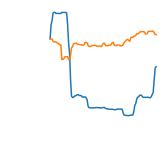

In [0]:
#Manual testing  (testing different conditions)

import csv
file="/content/drive/My Drive/Colab Notebooks/gazegesturedetection/testdata/after7.csv" 
leftx=[]
lefty=[]
trainx=[]
trainy=[]
with open(file, 'r') as f:
   reader = csv.reader(f,delimiter=';')
   for row in reader:
       leftx.append(float(row[0]))
       lefty.append(float(row[1]))
trainx.append(leftx)
trainy.append(lefty)
print(trainx[0])

x=[i for i in range(1,110+1,1)]
print((leftx))
plt.figure(figsize=(2.09, 2.09))
plt.axis('off')
plt.plot(x,trainx[0])
plt.plot(x,trainy[0])

plt.savefig('/content/drive/My Drive/Colab Notebooks/gazegesturedetection/testdata/after7.jpg')

im = cv2.imread('/content/drive/My Drive/Colab Notebooks/gazegesturedetection/testdata/after7.jpg')
print(im.shape)

#imCrop = im[20:135, 20:135]

# Display cropped image
#cv2.imshow(imCrop)
cv2.waitKey(0)
cv2.imwrite('/content/drive/My Drive/Colab Notebooks/gazegesturedetection/testdata/7.jpg',im)  
im = cv2.imread('/content/drive/My Drive/Colab Notebooks/gazegesturedetection/testdata/7.jpg')
print(im.shape)

In [0]:
img = cv2.imread('/content/drive/My Drive/Colab Notebooks/gazegesturedetection/testdata/7.jpg')  #tetsing different conditions
image=[]
    #img=img/255
img = img/255
print(img.shape)
image.append(img)
image=np.array(image)
#img.reshape(1,115,115,3)
print(image.shape)
Y_pred_class = model.predict(image, verbose=1)
print(Y_pred_class)
Y_pred_class = np.argmax(Y_pred_class, axis=1)
print(Y_pred_class.tolist())

(150, 150, 3)
(1, 150, 150, 3)
1/1 [==============================] - 0s 59ms/step
[[3.9483602e-06 4.7906445e-07 3.3565894e-07 9.9999523e-01]]
[3]


In [0]:
model.save("/content/drive/My Drive/Colab Notebooks/gazegesturedetection/cnn.h5")